In [118]:
! pip install --user poppler

ERROR: Could not find a version that satisfies the requirement poppler
ERROR: No matching distribution found for poppler
You should consider upgrading via the 'c:\users\wrope\anaconda3\python.exe -m pip install --upgrade pip' command.


In [43]:
import pandas as pd
import plotly.express as px

In [15]:
df = pd.read_excel(r'datos_microrred_horario_ano_sede_oriente.xlsx')

In [17]:
df["date"]=df["date"].apply(pd.to_datetime)

In [18]:
df["date"]=df["date"].apply(pd.to_datetime)
df["Month"] = df["date"].dt.month_name()

dic_fecha = {
   'January' :'Jan',
    'February':'Feb',
    'March':'Mar',
    'April':'Apr',
    'May':'May',
    'June':'Jun',
    'July':'Jul',
    'August':'Aug',
    'September':'Sep',
    'October':'Oct',
    'November':'Nov',
    'December':'Dec'
}
df["Month"] = df["Month"].apply(lambda x: dic_fecha[x])
df["hora"]=df["hora"].apply(lambda x: x+1)
demanda = df.groupby(["hora"])['power Impute medida2 KWh'].mean().reset_index()

In [21]:

demanda_2 = df.groupby(["hora","Month"])['power Impute medida2 KWh'].mean().reset_index()
demanda_3 = df.groupby(["Month"])['power Impute medida2 KWh'].sum().reset_index()
demanda_3['power Impute medida2 KWh'] = demanda_3['power Impute medida2 KWh']/1000

In [22]:
radiacion = df.groupby(["hora","Month"])['Solar Radiation Impute'].mean().reset_index()
radiacion_2 = df.groupby(["hora","Month"])['Solar Radiation Impute'].mean().reset_index()
radiacion_2['Solar Radiation Impute'] = radiacion_2['Solar Radiation Impute']/1000

In [23]:
temperatura = df.groupby(["hora","Month"])['Outside Temperature Impute C'].mean().reset_index()

In [26]:
x = demanda['hora']
y = demanda['power Impute medida2 KWh']

<BarContainer object of 24 artists>

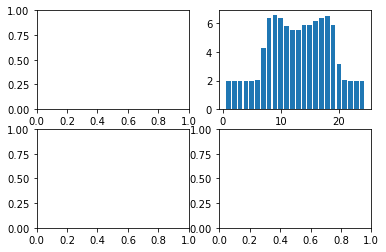

In [41]:
fig, ax = plt.subplots(2,2)
ax[0,1].bar(x, y)

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       #title='About as simple as it gets, folks')
#ax.show()

# Demanda

In [45]:
fig = px.bar(demanda,
              y='power Impute medida2 KWh',
              x='hora',
              template="ygridoff",
              #color='Month',
              category_orders={
                  "Month": [
                      "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug",
                      "Sep", "Oct", "Nov", "Dec"                  ]
              },
              #title="Load Profile 2019",
             
              )
fig.update_yaxes(nticks=10)
fig.update_xaxes(nticks=24)
fig.update_xaxes(title_text='Time (hour)')
fig.update_yaxes(title_text='Load demand (kWh)')
fig.update_xaxes(showline=True, linecolor='black')
fig.layout.update(showlegend=False) 
fig.update_yaxes(showline=True, linecolor='black')

fig.update_layout(
    font_family="Times New Roman",
    title_font_family="Times New Roman",
    font_size=14
    ,
    font_color="black",
)

fig.show()

#fig.write_image("load_profile_1.svg")

In [264]:
fig = px.box(demanda_2,
              y='power Impute medida2 KWh',
              x='Month',
              template="ygridoff",

              category_orders={
                  "Month": [
                      "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug",
                      "Sep", "Oct", "Nov", "Dec"                  ]
              },
              #title="Load Profile 2019",
              width=520,
              height=400)
fig.update_yaxes(nticks=10)
fig.update_xaxes(nticks=24)
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Load demand (kWh)')
fig.layout.update(showlegend=False) 
fig.update_yaxes(showline=True, linecolor='black')
fig.update_xaxes(showline=True, linecolor='black')

fig.update_layout(
    font_family="Times New Roman",
    title_font_family="Times New Roman",
    font_size=14
    ,
    font_color="black",
)
fig.show()
fig.write_image("load_profile_2.eps")

In [16]:
fig = px.bar(demanda_3,
              y='power Impute medida2 KWh',
              x='Month',
              template="ygridoff",

              category_orders={
                  "Month": [
                      "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug",
                      "Sep", "Oct", "Nov", "Dec"                  ]
              },
              #title="Load Profile 2019",
              width=520,
              height=400)
fig.update_yaxes(nticks=10)
fig.update_xaxes(nticks=24)
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Load demand (MWh/m)')
fig.update_xaxes(showline=True, linecolor='black')
fig.update_yaxes(showline=True, linecolor='black')


fig.update_layout(
    font_family="Times New Roman",
    title_font_family="Times New Roman",
    font_size=14
    ,
    font_color="black",
)

fig.show()
fig.write_image("load.svg")

# Temperatura


In [13]:
fig = px.line(temperatura,
              y='Outside Temperature Impute C',
              x='hora',
              template="xgridoff",
              color='Month',
              category_orders={
                  "Month": [
                      "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug",
                      "Sep", "Oct", "Nov", "Dec"                  ]
              },
              #title="Load Profile 2019",
              width=520,
              height=400)
fig.update_yaxes(nticks=10)
fig.update_xaxes(nticks=15)
fig.update_xaxes(title_text='Time (hour)')
fig.update_yaxes(title_text='Temperature (°C)')
 
fig.update_yaxes(showline=True, linecolor='black')
fig.update_xaxes(showline=True, linecolor='black')

fig.update_layout(
    font_family="Times New Roman",
    title_font_family="Times New Roman",
    font_size=14
    ,
    font_color="black",
        legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
        font_size=14
       
)
)
fig.show()
#fig.write_image("temperature.eps")

# Radiation

In [272]:
fig = px.line(radiacion,
              y='Solar Radiation Impute',
              x='hora',
              template="xgridoff",
              color='Month',
              category_orders={
                  "Month": [
                      "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug",
                      "Sep", "Oct", "Nov", "Dec"                  ]
              },
              #title="Load Profile 2019",
              width=520,
              height=400)
fig.update_yaxes(nticks=10)
fig.update_xaxes(nticks=15)
fig.update_xaxes(title_text='Time (hour)')
fig.update_yaxes(title_text='Solar radiation (Wh/m2)')
#fig.layout.update(showlegend=False) 
fig.update_yaxes(showline=True, linecolor='black')
fig.update_xaxes(showline=True, linecolor='black')

fig.update_layout(
    font_family="Times New Roman",
    title_font_family="Times New Roman",
    font_size=14
    ,
    font_color="black",
    
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
        font_size=14       
)
)
fig.show()
fig.write_image("solar_radiaton_1.eps")

In [283]:
fig = px.bar(radiacion_2,
              y='Solar Radiation Impute',
              x='Month',
              template="xgridoff",
              
              category_orders={
                  "Month": [
                      "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug",
                      "Sep", "Oct", "Nov", "Dec"                  ]
              },
              #title="Load Profile 2019",
              width=520,
              height=400)
fig.update_yaxes(nticks=10)
fig.update_xaxes(nticks=15)
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Solar radiation (kWh/m2)')
#fig.layout.update(showlegend=False) 
fig.update_yaxes(showline=True, linecolor='black')
fig.update_xaxes(showline=True, linecolor='black')

fig.update_layout(
    font_family="Times New Roman",
    title_font_family="Times New Roman",
    font_size=14
    ,
    font_color="black",
)
fig.show()
fig.write_image("solar_radiaton_2.eps")

In [95]:
import os
os.getcwd()

'C:\\Users\\wrope\\Documents\\01. UdeA\\00. Tesis\\09. Implementacion\\dimensionamiento_microrred\\data'